In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Training Set

## Missing Values & Encoding

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
train = pd.read_csv('train.csv')

In [4]:
#Checking Missing Values
print(train.isnull().sum())


UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date_of_Birth                             0
Employment_Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS_SCORE                         0
PERFORM_CNS_SCORE_DESCRIPTION             0
PRI_NO_OF_ACCTS                           0
PRI_ACTIVE_ACCTS                

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002964A6D6F48>,
      dtype=object)

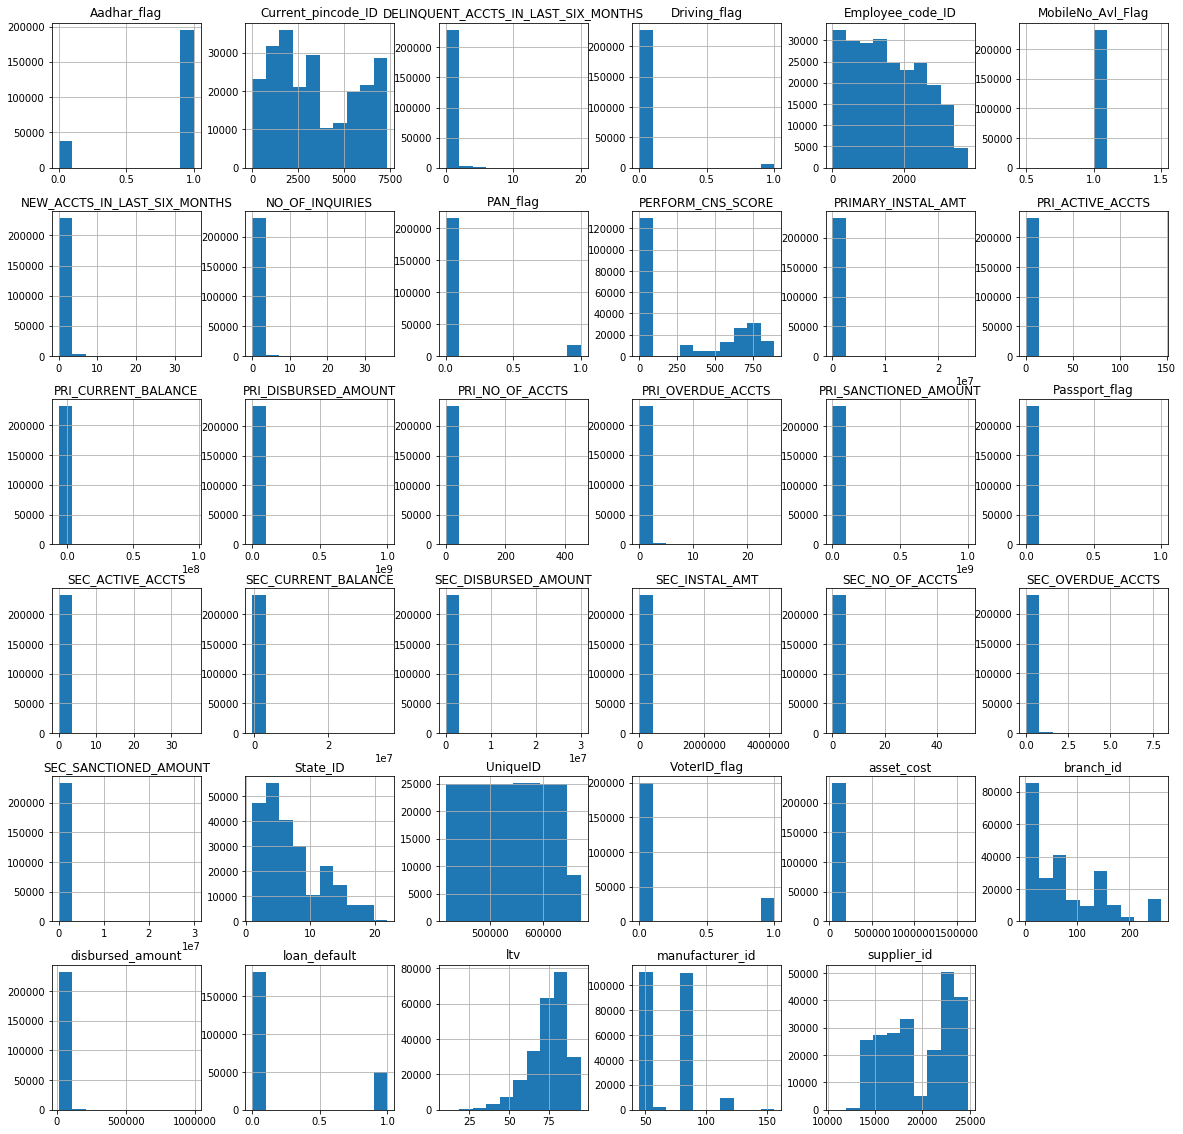

In [8]:
train.hist(figsize=(20,20))

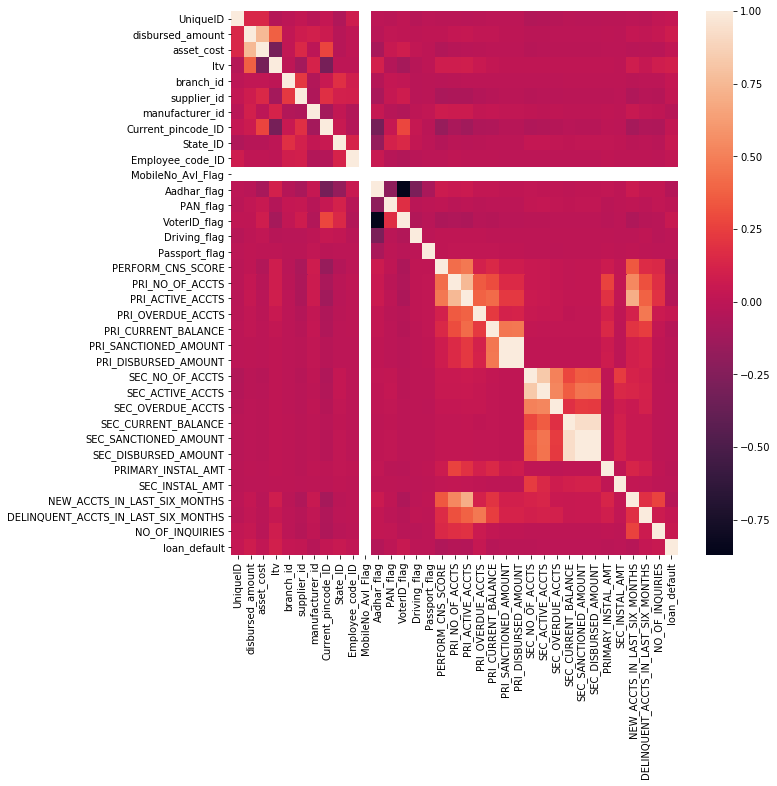

In [14]:
plt.figure(figsize=(10,10))
mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(train.corr())

In [15]:
# Checking unique values
print("Distinct Emp Type :",train["Employment_Type"].unique())
#Checking missing valus in percentage
print("Missing Emp Type %:",train["Employment_Type"].isnull().sum() / len(train) * 100)

Distinct Emp Type : ['Salaried' 'Self employed' nan]
Missing Emp Type %: 3.2858110948128703


In [16]:
# Imputing Employment.Type as Other
train["Employment_Type"].fillna("Other", inplace = True)

In [17]:
#cross checking
print("Distinct Emp Type :",train["Employment_Type"].unique())
print("Missing Emp Type %:",train["Employment_Type"].isnull().sum() / len(train) * 100)

Distinct Emp Type : ['Salaried' 'Self employed' 'Other']
Missing Emp Type %: 0.0


In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train.Employment_Type = le.fit_transform(train.Employment_Type)

In [19]:
print("Distinct Emp Type :",train["Employment_Type"].unique())

Distinct Emp Type : [1 2 0]


In [20]:
print("Distinct Emp Type :",train["PERFORM_CNS_SCORE_DESCRIPTION"].unique())

Distinct Emp Type : ['No Bureau History Available' 'I-Medium Risk' 'L-Very High Risk'
 'A-Very Low Risk' 'Not Scored: Not Enough Info available on the customer'
 'D-Very Low Risk' 'M-Very High Risk' 'B-Very Low Risk' 'C-Very Low Risk'
 'E-Low Risk' 'H-Medium Risk' 'F-Low Risk' 'K-High Risk'
 'Not Scored: No Activity seen on the customer (Inactive)'
 'Not Scored: Sufficient History Not Available'
 'Not Scored: No Updates available in last 36 months' 'G-Low Risk'
 'J-High Risk' 'Not Scored: Only a Guarantor'
 'Not Scored: More than 50 active Accounts found']


In [21]:
print("Distinct Emp Type :",train["PERFORM_CNS_SCORE_DESCRIPTION"].unique())

Distinct Emp Type : ['No Bureau History Available' 'I-Medium Risk' 'L-Very High Risk'
 'A-Very Low Risk' 'Not Scored: Not Enough Info available on the customer'
 'D-Very Low Risk' 'M-Very High Risk' 'B-Very Low Risk' 'C-Very Low Risk'
 'E-Low Risk' 'H-Medium Risk' 'F-Low Risk' 'K-High Risk'
 'Not Scored: No Activity seen on the customer (Inactive)'
 'Not Scored: Sufficient History Not Available'
 'Not Scored: No Updates available in last 36 months' 'G-Low Risk'
 'J-High Risk' 'Not Scored: Only a Guarantor'
 'Not Scored: More than 50 active Accounts found']


In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train.PERFORM_CNS_SCORE_DESCRIPTION = le.fit_transform(train.PERFORM_CNS_SCORE_DESCRIPTION)

In [23]:
print("Distinct Emp Type :",train["PERFORM_CNS_SCORE_DESCRIPTION"].unique())

Distinct Emp Type : [13  8 11  0 17  3 12  1  2  4  7  5 10 15 19 16  6  9 18 14]


In [24]:
#convert year into month
def change_col_month(col):
    year = int(col.split()[0].replace('yrs',''))
    month = int(col.split()[1].replace('mon',''))
    return year*12+month

train['CREDIT_HISTORY_LENGTH'] = train['CREDIT_HISTORY_LENGTH'].apply(change_col_month)
train['AVERAGE_ACCT_AGE'] = train['AVERAGE_ACCT_AGE'].apply(change_col_month)

In [25]:
#calculate age
def age(dob):
    yr = int(dob[-2:])
    if yr >=0 and yr < 20:
        return yr + 2000
    else:
         return yr + 1900
        
train['Date_of_Birth'] = train['Date_of_Birth'].apply(age)
train['DisbursalDate'] = train['DisbursalDate'].apply(age)
train['Age']=train['DisbursalDate']-train['Date_of_Birth']
train= train.drop(['DisbursalDate','Date_of_Birth'],axis=1)

train.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment_Type,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,loan_default,Age
0,420825,50578,58400,89.55,67,22807,45,1441,1,6,1998,1,1,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34
1,537409,47145,65550,73.23,67,22807,45,1502,2,6,1998,1,1,0,0,0,0,598,8,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,23,23,0,1,33
2,417566,53278,61360,89.63,67,22807,45,1497,2,6,1998,1,1,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33
3,624493,57513,66113,88.48,67,22807,45,1501,2,6,1998,1,1,0,0,0,0,305,11,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,8,15,1,1,25
4,539055,52378,60300,88.39,67,22807,45,1495,2,6,1998,1,1,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,41


In [26]:
train= train.drop(['UniqueID'], axis = 1)
train.head()

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment_Type,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,loan_default,Age
0,50578,58400,89.55,67,22807,45,1441,1,6,1998,1,1,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34
1,47145,65550,73.23,67,22807,45,1502,2,6,1998,1,1,0,0,0,0,598,8,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,23,23,0,1,33
2,53278,61360,89.63,67,22807,45,1497,2,6,1998,1,1,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33
3,57513,66113,88.48,67,22807,45,1501,2,6,1998,1,1,0,0,0,0,305,11,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,8,15,1,1,25
4,52378,60300,88.39,67,22807,45,1495,2,6,1998,1,1,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,41


# Test Set

## Missing Values & Encoding

In [27]:
test = pd.read_csv('test_bqCt9Pv.csv')

In [28]:
#Checking Missing Values
print(test.isnull().sum())


UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date_of_Birth                             0
Employment_Type                        3443
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS_SCORE                         0
PERFORM_CNS_SCORE_DESCRIPTION             0
PRI_NO_OF_ACCTS                           0
PRI_ACTIVE_ACCTS                

In [29]:
# Checking unique values
print("Distinct Emp Type :",test["Employment_Type"].unique())
#Checking missing valus in percentage
print("Missing Emp Type %:",test["Employment_Type"].isnull().sum() / len(test) * 100)

Distinct Emp Type : ['Salaried' 'Self employed' nan]
Missing Emp Type %: 3.063385294326998


In [30]:
# Imputing Employment.Type as Other
test["Employment_Type"].fillna("Other", inplace = True)

In [31]:
#cross checking
print("Distinct Emp Type :",test["Employment_Type"].unique())
print("Missing Emp Type %:",test["Employment_Type"].isnull().sum() / len(test) * 100)

Distinct Emp Type : ['Salaried' 'Self employed' 'Other']
Missing Emp Type %: 0.0


In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
test.Employment_Type = le.fit_transform(test.Employment_Type)

In [33]:
print("Distinct Emp Type :",test["Employment_Type"].unique())

Distinct Emp Type : [1 2 0]


In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
test.PERFORM_CNS_SCORE_DESCRIPTION = le.fit_transform(test.PERFORM_CNS_SCORE_DESCRIPTION)

In [35]:
print("Distinct Emp Type :",test["PERFORM_CNS_SCORE_DESCRIPTION"].unique())

Distinct Emp Type : [13  2 17 10  1  8  3  0 12  4  5  6 14  7  9 11 18 16 15]


In [36]:
#convert year into month
def change_col_month(col):
    year = int(col.split()[0].replace('yrs',''))
    month = int(col.split()[1].replace('mon',''))
    return year*12+month

test['CREDIT_HISTORY_LENGTH'] = test['CREDIT_HISTORY_LENGTH'].apply(change_col_month)
test['AVERAGE_ACCT_AGE'] = test['AVERAGE_ACCT_AGE'].apply(change_col_month)

In [37]:
#calculate age
def age(dob):
    yr = int(dob[-2:])
    if yr >=0 and yr < 20:
        return yr + 2000
    else:
         return yr + 1900
        
test['Date_of_Birth'] = test['Date_of_Birth'].apply(age)
test['DisbursalDate'] = test['DisbursalDate'].apply(age)
test['Age']=test['DisbursalDate']-test['Date_of_Birth']
test= test.drop(['DisbursalDate','Date_of_Birth'],axis=1)

test.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment_Type,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,Age
0,655269,53478,63558,86.54,67,22807,45,1497,1,6,1998,1,1,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,44
1,723482,55513,63163,89.45,67,22807,45,1497,2,6,1998,1,1,0,0,0,0,749,2,2,1,0,43898,48780,48780,0,0,0,0,0,0,5605,0,1,0,8,12,1,33
2,758529,65282,84320,79.93,78,23135,86,2071,1,4,1646,1,1,1,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23
3,763449,46905,63896,76.58,78,17014,45,2070,2,4,1646,1,1,0,0,0,0,14,17,1,1,1,132480,255000,255000,0,0,0,0,0,0,0,0,0,0,29,29,0,45
4,708663,51428,63896,86.08,78,17014,45,2069,1,4,1646,1,1,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46


In [38]:
test = test.drop(['UniqueID'], axis = 1)
test.head()

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment_Type,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,Age
0,53478,63558,86.54,67,22807,45,1497,1,6,1998,1,1,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,44
1,55513,63163,89.45,67,22807,45,1497,2,6,1998,1,1,0,0,0,0,749,2,2,1,0,43898,48780,48780,0,0,0,0,0,0,5605,0,1,0,8,12,1,33
2,65282,84320,79.93,78,23135,86,2071,1,4,1646,1,1,1,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23
3,46905,63896,76.58,78,17014,45,2070,2,4,1646,1,1,0,0,0,0,14,17,1,1,1,132480,255000,255000,0,0,0,0,0,0,0,0,0,0,29,29,0,45
4,51428,63896,86.08,78,17014,45,2069,1,4,1646,1,1,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46


# splitting in training set and validation set

In [39]:
X = train.drop(['loan_default'], axis = 1)
y = train['loan_default']

In [40]:
from sklearn.model_selection import train_test_split
X_train1, X_validation1, y_train1, y_validation1 = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [41]:
X_train1.shape

(186523, 38)

In [42]:
X_validation1.shape

(46631, 38)

In [43]:
y_train1.shape

(186523,)

In [44]:
y_validation1.shape

(46631,)

# feature Scalling

In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train1)
X_validation = sc.transform(X_validation1)

In [46]:
X_train

array([[-0.46196275, -0.40755865, -0.11853413, ..., -0.56904921,
        -0.29306433, -0.72527284],
       [ 2.07554241,  0.87020426,  1.28799546, ..., -0.25392604,
        -0.29306433, -0.82714749],
       [-1.53969602, -0.37217445, -1.95609698, ..., -0.56904921,
        -0.29306433, -0.01215026],
       ...,
       [ 2.80546664,  3.15282612, -0.42915729, ..., -0.56904921,
        -0.29306433, -1.13277145],
       [-0.00939747,  0.28848795, -0.51990113, ..., -0.56904921,
        -0.29306433,  0.497223  ],
       [ 0.29690728, -0.46653232,  1.2914856 , ..., -0.21891236,
         1.11501991, -0.62339818]])

In [47]:
X_validation

array([[-0.65340322, -0.6926767 ,  0.02019925, ...,  3.56256568,
        -0.29306433,  0.497223  ],
       [ 2.4035948 ,  2.962695  , -0.59144916, ..., -0.56904921,
        -0.29306433, -0.82714749],
       [-1.99501804,  0.52946748, -3.59995661, ..., -0.56904921,
        -0.29306433, -0.72527284],
       ...,
       [ 1.12469588,  1.03669349, -0.14732785, ..., -0.07885762,
        -0.29306433, -0.62339818],
       [-1.41227325, -1.37939235, -0.01121208, ..., -0.56904921,
        -0.29306433,  2.12721746],
       [ 1.10539868,  1.29717365, -0.36720716, ..., -0.56904921,
        -0.29306433, -0.72527284]])

# logistic regresssion

In [51]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
lrclassifier = LogisticRegression(random_state = 0)
lrclassifier.fit(X_train1, y_train1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Confusion matrix for training set

In [52]:
#accuracy on training set
y_train_pred_l = lrclassifier.predict(X_train1)

In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_train1, y_train_pred_l)
print(cm)
accuracy_score(y_train1, y_train_pred_l)

[[145921      8]
 [ 40592      2]]


0.7823324737431845

# Confusion Matrix for validation set

In [54]:
y_pred_l = lrclassifier.predict(X_validation1)

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_validation1, y_pred_l)
print(cm)
accuracy_score(y_validation1, y_pred_l)

[[36609     5]
 [10017     0]]


0.7850785957839206

# grid search 

In [57]:
from sklearn.model_selection import GridSearchCV
parameters = {'solver':('lbfgs', 'newton-cg','sag','saga'), 
               'multi_class':('auto','ovr','multinomial'),
              'class_weight': ({1:0.5,0:0.5},{1:0.6,0:0.4},{1:0.4,0:0.6})}
grid_search = GridSearchCV(estimator = lrclassifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train1, y_train1)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 78.24 %
Best Parameters: {'class_weight': {1: 0.5, 0: 0.5}, 'multi_class': 'auto', 'solver': 'sag'}


# training with best parameters

In [58]:
from sklearn.linear_model import LogisticRegression
new_lrclassifier = LogisticRegression( class_weight = {1: 0.4, 0: 0.6}, 
                                      multi_class = 'auto', 
                                      solver= 'saga', 
                                      random_state = 0)
new_lrclassifier.fit(X_train1, y_train1)

LogisticRegression(C=1.0, class_weight={0: 0.6, 1: 0.4}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
new_y_train_pred = new_lrclassifier.predict(X_train1)

In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_train1, new_y_train_pred)
print(cm)
accuracy_score(y_train1, new_y_train_pred)

[[145929      0]
 [ 40594      0]]


0.7823646413579023

In [61]:
new_y_pred = new_lrclassifier.predict(X_validation1)

In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_validation1, new_y_pred)
print(cm)
accuracy_score(y_validation1, new_y_pred)

[[36614     0]
 [10017     0]]


0.785185820591452

# Predicted Result from test set

In [64]:
test_pred = new_lrclassifier.predict(test)
test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)